In [19]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
import seaborn as sbn

train_data=pd.read_csv('train_data.csv')
train_data['type']='train'
test=pd.read_csv('test_a.csv')
test['tradeMoney']=0
test['type']='test'

data=pd.concat([train_data,test],axis=0)
data

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,type
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,...,0.000000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0,train
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,...,0.000000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0,train
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,...,0.000000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0,train
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,...,3080.033100,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0,train
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,...,0.000000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0,train
5,100304268,223.35,未知方式,4室3厅3卫,低,2,暂无数据,其他,XQ00457,SH,...,0.000000,48204,44561,719428,4832.0,1304.0,0,2018/11/14,14000.0,train
6,100304055,78.94,未知方式,2室2厅1卫,中,18,暂无数据,其他,XQ00246,SH,...,0.000000,8750,1467,253337,1586.0,469.0,0,2018/11/18,1000.0,train
7,100295123,76.00,未知方式,2室1厅1卫,中,5,暂无数据,其他,XQ02331,SH,...,0.000000,28546,0,371900,40787.0,2942.0,0,2018/3/24,1800.0,train
8,100293141,120.55,未知方式,3室2厅1卫,中,6,暂无数据,其他,XQ02346,SH,...,0.000000,28546,0,371900,40787.0,2942.0,0,2018/3/19,1450.0,train
9,100293063,83.00,未知方式,3室1厅1卫,中,5,暂无数据,其他,XQ02310,SH,...,0.000000,28546,0,371900,34441.0,3035.0,0,2018/4/26,1700.0,train


In [23]:
#根据分析，可以将数据属性分为类别特征和连续型特征
#类别特征
category_feauture=[ 'rentType', 'houseType', 'houseFloor','houseToward', 'houseDecoration', 'communityName', 'city', 'region',
                    'plate', 'buildYear']

#连续型特征
Value_feauture=[f for f in data.columns if f not in category_feauture and f not in ['tradeTime','tradeMoney']]
Value_feauture

['ID',
 'area',
 'totalFloor',
 'saleSecHouseNum',
 'subwayStationNum',
 'busStationNum',
 'interSchoolNum',
 'schoolNum',
 'privateSchoolNum',
 'hospitalNum',
 'drugStoreNum',
 'gymNum',
 'bankNum',
 'shopNum',
 'parkNum',
 'mallNum',
 'superMarketNum',
 'totalTradeMoney',
 'totalTradeArea',
 'tradeMeanPrice',
 'tradeSecNum',
 'totalNewTradeMoney',
 'totalNewTradeArea',
 'tradeNewMeanPrice',
 'tradeNewNum',
 'remainNewNum',
 'supplyNewNum',
 'supplyLandNum',
 'supplyLandArea',
 'tradeLandNum',
 'tradeLandArea',
 'landTotalPrice',
 'landMeanPrice',
 'totalWorkers',
 'newWorkers',
 'residentPopulation',
 'pv',
 'uv',
 'lookNum',
 'type']

In [20]:
print('缺失值的列:{}'.format(data.columns[data.isnull().any()].tolist()))

null_ratio=len(data['pv'][pd.isnull(data['pv'])])/len(data)

print('缺失比例:{}'.format(null_ratio))

print("缺失值个数:")

print("pv缺失值的个数:",data['pv'].isnull().sum())

print("uv缺失值的个数:",data['uv'].isnull().sum())

缺失值的列:['pv', 'uv']
缺失比例:0.0004554874854813364
缺失值个数:
pv缺失值的个数: 20
uv缺失值的个数: 20


In [33]:
data[data['rentType']=='--']
#rentType 

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,type
4370,100312249,63.26,--,1室2厅1卫,低,30,南,其他,XQ03008,SH,...,0.0,102958,492,70013,NaN,NaN,0,2018/12/6,10700.0,train
4396,100312169,49.00,--,2室1厅1卫,低,7,南,其他,XQ03002,SH,...,0.0,102958,492,70013,NaN,NaN,9,2018/12/23,8400.0,train
4428,100312036,37.80,--,1室1厅1卫,高,7,南,其他,XQ03002,SH,...,0.0,102958,492,70013,NaN,NaN,0,2018/12/3,5300.0,train
38859,100312203,136.00,--,3室2厅2卫,中,37,东,其他,XQ02968,SH,...,0.0,102958,492,70013,NaN,NaN,0,2018/12/15,1400.0,train
39407,100312240,30.00,--,1室1厅1卫,中,6,北,其他,XQ02980,SH,...,0.0,102958,492,70013,NaN,NaN,0,2018/12/9,4600.0,train


# 连续型特征做缺失值处理

## 1.直接删除

In [29]:
#根据上述分析
#由于测试集中pv,uv值存在缺失，所以这里不太好删除
#可以考虑其他方式

## 2.插补法（平均值,中位数，四分位数等）

In [50]:
print("均值")
print("pv:{}".format(data[data['pv'].notnull()]['pv'].mean()))
print("uv:{}".format(data[data['uv'].notnull()]['uv'].mean()))
#是否可以用该模块，当天的平均值进行填充，这个可以到时候试一试

print("中值")
print("pv:{}".format(data[data['pv'].notnull()]['pv'].median()))
print("uv:{}".format(data[data['uv'].notnull()]['uv'].median()))

print("四分位数")
sifen=np.percentile(data[data['pv'].notnull()]['pv'], (25,50,75), interpolation='midpoint')
print(sifen)

均值
pv:26736.28187017248
uv:3050.750461391237
中值
pv:19606.0
uv:2308.0
四分位数
[ 7580. 19606. 34441.]


In [59]:
# tradeTime 可以分为年月日,因为都是18年的数据，所以提取月日数据特征就好
# pv ，uv 先用均值填充

def months(d):
    s=d.split('/')
    return int(s[1])

def days(d):
    s=d.split('/')
    return int(s[2])
data['month']=data['tradeTime'].apply(months)
data['days']=data['tradeTime'].apply(days)

data['pv']=data['pv'].fillna(data[data['pv'].notnull()]['pv'].mean())
data['uv']=data['uv'].fillna(data[data['uv'].notnull()]['uv'].mean())
data[data['pv'].notnull()]

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,type,month,days
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,...,614,111546,1124.0,284.0,0,2018/11/28,2000.0,train,11,28
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,...,148,157552,701.0,22.0,1,2018/12/16,2000.0,train,12,16
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,...,520,131744,57.0,20.0,1,2018/12/22,16000.0,train,12,22
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,...,1665,253337,888.0,279.0,9,2018/12/21,1600.0,train,12,21
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,...,117,125309,2038.0,480.0,0,2018/11/18,2900.0,train,11,18
5,100304268,223.35,未知方式,4室3厅3卫,低,2,暂无数据,其他,XQ00457,SH,...,44561,719428,4832.0,1304.0,0,2018/11/14,14000.0,train,11,14
6,100304055,78.94,未知方式,2室2厅1卫,中,18,暂无数据,其他,XQ00246,SH,...,1467,253337,1586.0,469.0,0,2018/11/18,1000.0,train,11,18
7,100295123,76.00,未知方式,2室1厅1卫,中,5,暂无数据,其他,XQ02331,SH,...,0,371900,40787.0,2942.0,0,2018/3/24,1800.0,train,3,24
8,100293141,120.55,未知方式,3室2厅1卫,中,6,暂无数据,其他,XQ02346,SH,...,0,371900,40787.0,2942.0,0,2018/3/19,1450.0,train,3,19
9,100293063,83.00,未知方式,3室1厅1卫,中,5,暂无数据,其他,XQ02310,SH,...,0,371900,34441.0,3035.0,0,2018/4/26,1700.0,train,4,26


# 类别特征的处理

In [61]:
#缺失值少：

#如果“缺失”没有业务含义，用众数填充
#dataframe [age] [ dataframe.age.isnull() ] = dataframe.age.dropna().mode().values    
#众数填补 , mode()函数就是取出现次数最多的元素。
#如果“缺失”包含了业务含义，保留该变量，并且直接将缺失值填充为默认值。
# dataframe.loc [ dataframe [ column ] .isnull(),column ] = value  
# 将某一列column中缺失元素的值，用value值进行填充。

#缺失值多：

#剔除掉缺失率>80%并且未来依然会高缺失的变量


#缺失值适中：

#将缺失当做新的一类，如one-hot来处理
print("众数")

print(data[data['rentType']!='--']['rentType'].mode())


#这个缺失值，适中这里作为新的一类来处理
#print(data[data['houseToward']=='暂无数据']['houseToward'].count())

print(data[data['buildYear']=='暂无信息']['buildYear'].count())


众数
0    未知方式
dtype: object
2136
2936


In [69]:
# 将缺失值用众数进行填充
data['rentType'][data['rentType']=='--']='未知方式'


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# 异常值分析及处理

In [58]:
#类别特征异常值

#这里异常值可以作为缺失值处理

for f in category_feauture:
    print(data[f].unique())
    print(data[f].value_counts())
    print(len(data[f].unique()))

#类别数量

#rentType 3  这里存在一个‘-’异常值  ,且大部分是未知方式，是否可以用这个特征，我们将'-'作为缺失值处理
#这五条数据的缺失，可能是系统人员删除了，这缺失的五条数据中，pv，uv也存在缺失

#houseToward  10    南房间更受大家喜欢    ，有2136条暂无数据，“暂无数据”该数据作为缺失值
#该缺失值可能是由于房东没有将信息补充完整

#houseDecoration 4   大部分是其他方式     ，这里不太合适作为缺失值处理


#buildYear 66  分散   建筑年代含有暂无信息这个值，有2936条数据，这里作为缺失值
#建筑年代的数据缺失，可能是因为房主自己忘记，或者没有进行信息填写原因造成的


['未知方式' '整租' '合租' '--']
未知方式    32944
整租       5736
合租       5224
--          5
Name: rentType, dtype: int64
4
['2室1厅1卫' '3室2厅2卫' '1室1厅1卫' '3室2厅3卫' '4室3厅3卫' '2室2厅1卫' '3室2厅1卫' '3室1厅1卫'
 '5室2厅3卫' '2室1厅2卫' '4室2厅2卫' '1室0厅1卫' '4室2厅3卫' '1室0厅0卫' '2室2厅2卫' '2室0厅1卫'
 '1室2厅1卫' '6室3厅4卫' '4室2厅4卫' '4室2厅1卫' '5室3厅5卫' '4室3厅2卫' '6室3厅2卫' '5室2厅2卫'
 '5室2厅4卫' '1室1厅2卫' '4室1厅3卫' '3室0厅1卫' '5室3厅4卫' '5室5厅4卫' '4室3厅5卫' '4室3厅4卫'
 '0室0厅1卫' '5室2厅5卫' '7室2厅3卫' '3室2厅4卫' '3室3厅2卫' '3室1厅2卫' '5室4厅5卫' '5室3厅3卫'
 '5室2厅6卫' '5室3厅1卫' '3室4厅4卫' '6室2厅4卫' '6室1厅4卫' '3室1厅3卫' '6室2厅3卫' '5室4厅3卫'
 '2室2厅3卫' '4室1厅1卫' '5室1厅1卫' '1室2厅2卫' '6室1厅1卫' '4室1厅2卫' '5室3厅6卫' '4室2厅5卫'
 '6室2厅2卫' '5室1厅2卫' '5室4厅4卫' '2室3厅1卫' '6室4厅2卫' '7室1厅7卫' '3室3厅4卫' '3室2厅5卫'
 '6室3厅5卫' '4室0厅1卫' '5室4厅2卫' '7室4厅3卫' '6室3厅3卫' '6室2厅5卫' '6室2厅7卫' '4室0厅4卫'
 '2室2厅0卫' '3室3厅3卫' '8室3厅4卫' '6室2厅6卫' '1室1厅0卫' '2室1厅0卫' '5室3厅2卫' '5室2厅1卫'
 '2室0厅0卫' '7室1厅1卫' '6室2厅1卫' '8室2厅4卫' '7室2厅1卫' '2室0厅2卫' '3室0厅2卫' '4室0厅2卫'
 '3室1厅0卫' '3室0厅0卫' '9室2厅5卫' '6室4厅5卫' '4室4厅2卫' '4室1厅4卫' '8室4厅4卫' '7室2厅4卫'
 '7室1厅3卫' '8室

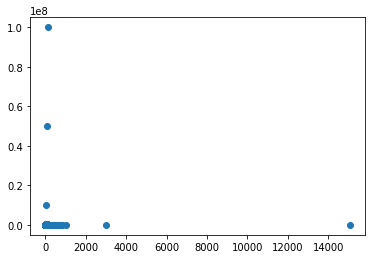

In [72]:
#这里存在面积，交易金额异常
plt.scatter(data['area'],data['tradeMoney'])
#首先我们先尝试去除一些过度的数据
data_one=data.drop([''])

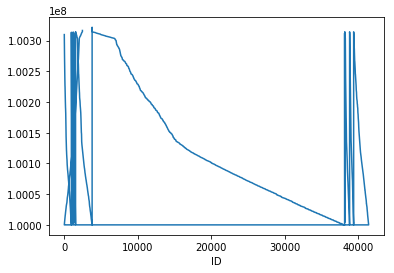

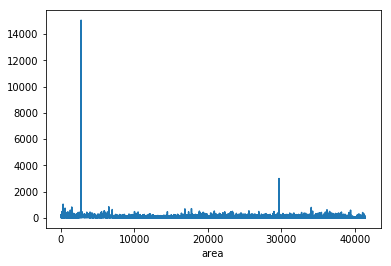

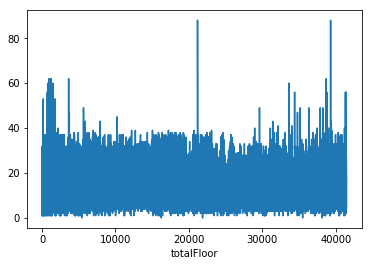

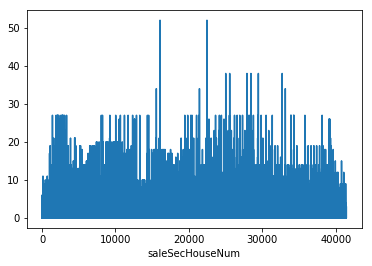

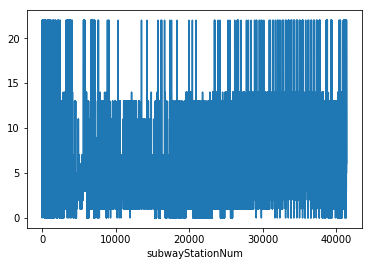

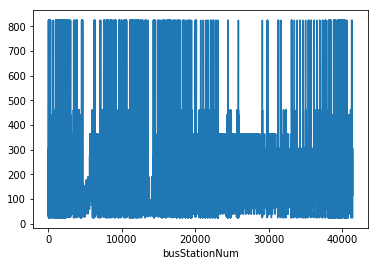

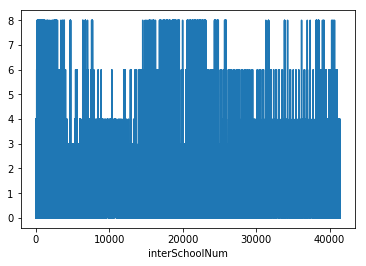

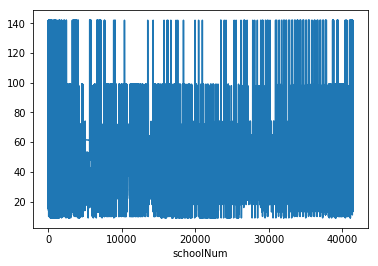

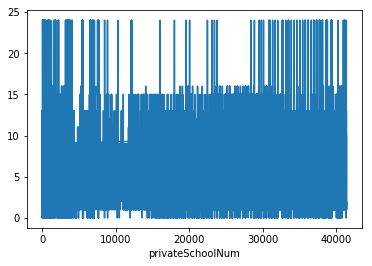

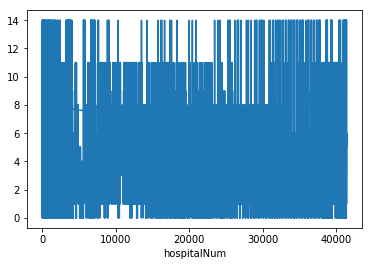

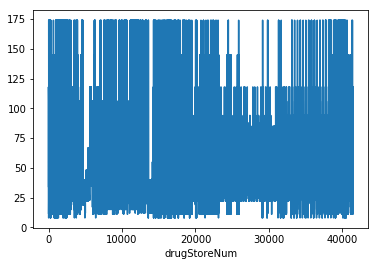

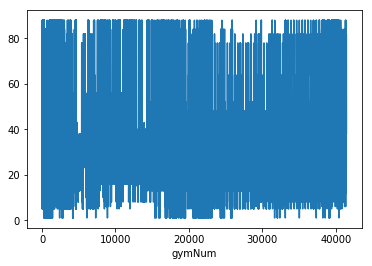

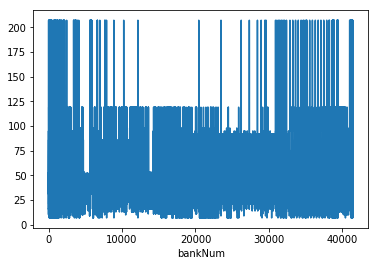

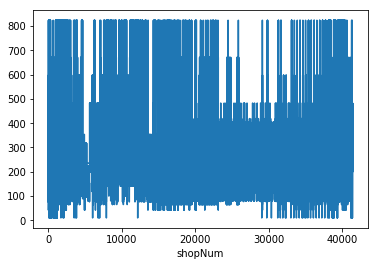

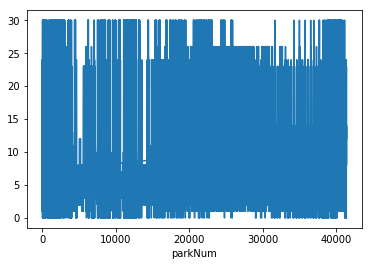

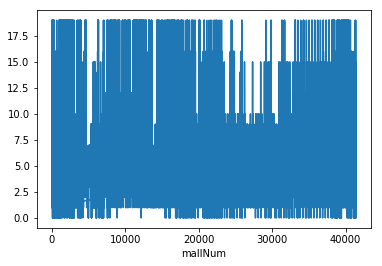

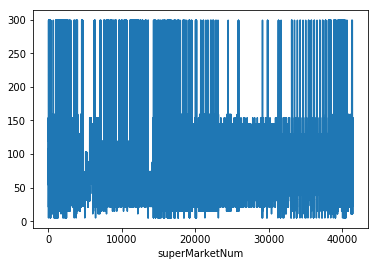

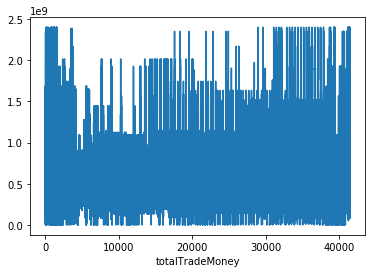

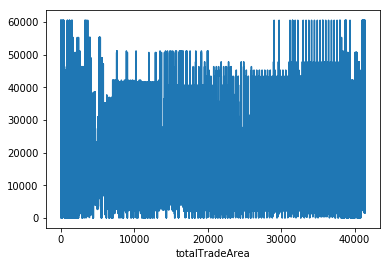

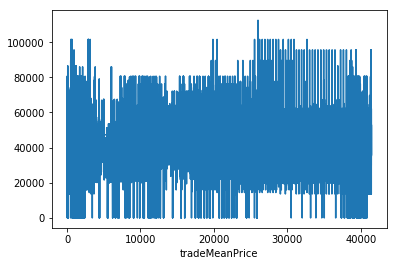

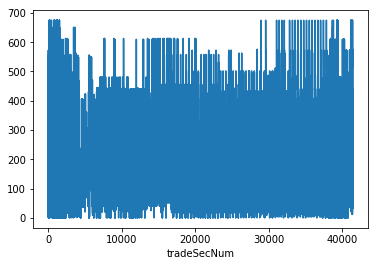

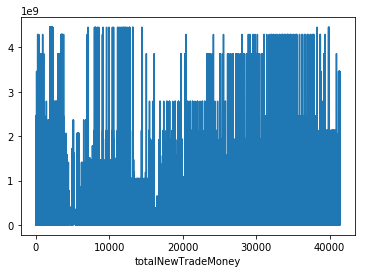

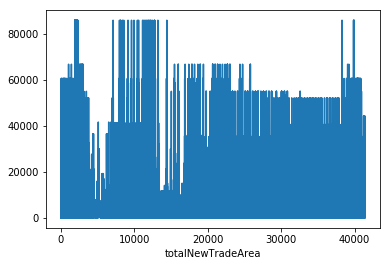

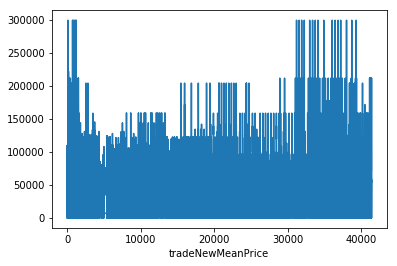

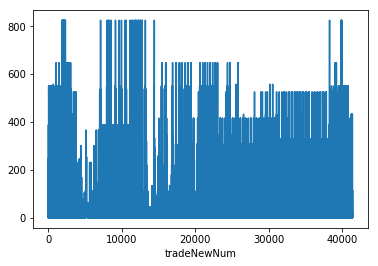

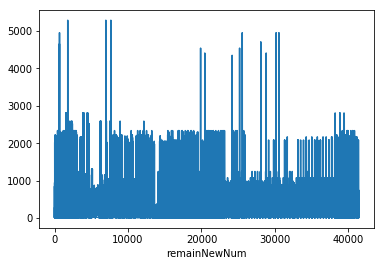

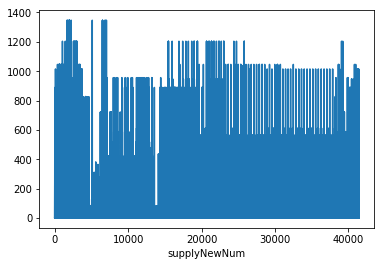

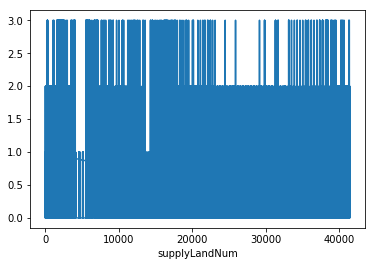

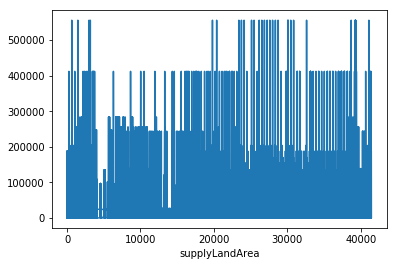

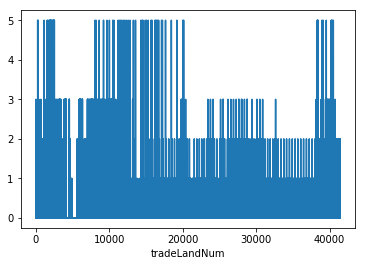

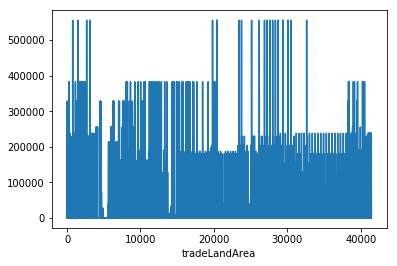

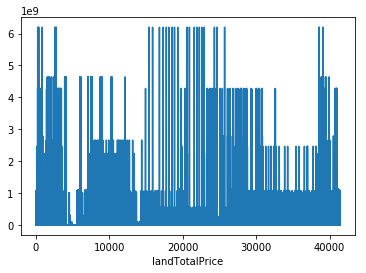

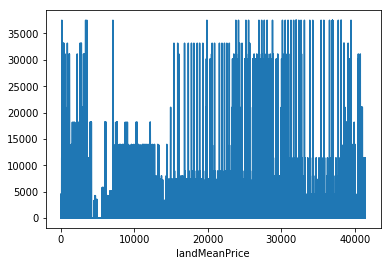

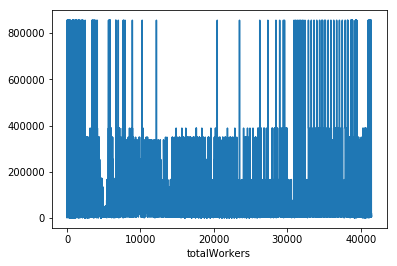

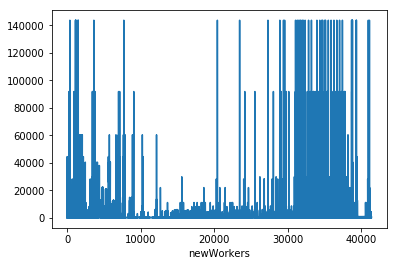

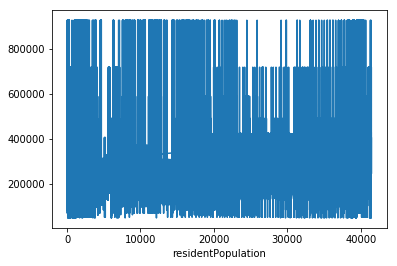

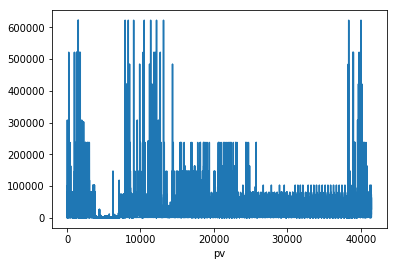

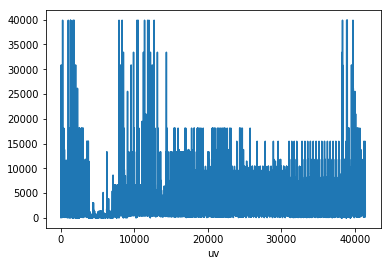

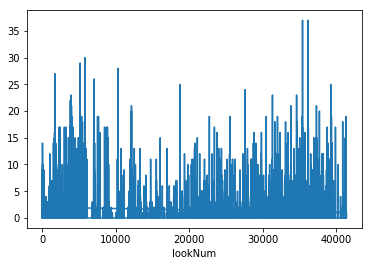

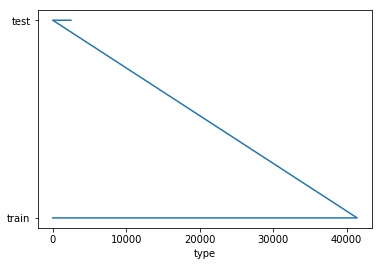

In [75]:
for f in Value_feauture:
    plt.plot(data[f])
    plt.xlabel(f)
    plt.show()
    
#从下图可知，由于ID对于建模没有影响，所以我们之后训练可以剔除这个特征

#特征area有一些异常凸起的数据


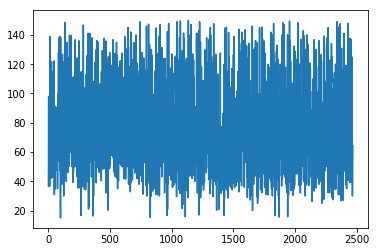

In [76]:
plt.plot(test['area'])
#测试集中area的数据分布都在0-200之间
#所以是否在训练集中，我们是否需要把大于200的数据进行删除？


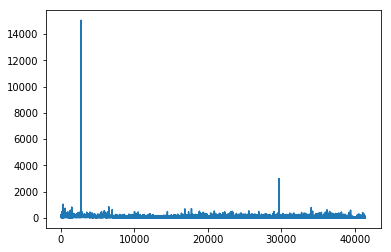

In [77]:
#可以看出训练集的数据大部分都在与训练集数据分布相同的地方，只有一小部分是突出的数据，我们将突出的数据划为异常数据
plt.plot(train_data['area'])

In [88]:
data[data['area']>200]

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,type,month,days
5,100304268,223.35,未知方式,4室3厅3卫,低,2,暂无数据,其他,XQ00457,SH,...,44561,719428,4832.0,1304.0,0,2018/11/14,14000.0,train,11,14
23,100284167,235.86,未知方式,5室2厅3卫,低,1,暂无数据,毛坯,XQ03074,SH,...,0,210903,25151.0,2137.0,0,2018/2/28,8000.0,train,2,28
24,100283730,222.10,未知方式,4室3厅3卫,低,3,暂无数据,其他,XQ01295,SH,...,12790,928198,8668.0,1374.0,2,2018/11/6,6000.0,train,11,6
51,100262646,207.56,未知方式,4室2厅3卫,低,3,暂无数据,精装,XQ01390,SH,...,0,274232,33974.0,2393.0,0,2018/2/26,12000.0,train,2,26
97,100226153,251.00,未知方式,5室2厅3卫,高,16,暂无数据,精装,XQ02351,SH,...,0,371900,72018.0,5286.0,0,2018/5/20,4500.0,train,5,20
108,100218406,326.34,未知方式,6室3厅4卫,低,2,暂无数据,精装,XQ01352,SH,...,0,928198,52511.0,4868.0,0,2018/3/8,18000.0,train,3,8
110,100218310,207.56,未知方式,4室2厅4卫,低,3,暂无数据,其他,XQ01390,SH,...,0,274232,36938.0,2889.0,0,2018/3/21,10000.0,train,3,21
112,100216358,218.81,未知方式,4室2厅3卫,低,1,暂无数据,毛坯,XQ01319,SH,...,0,928198,52511.0,4868.0,0,2018/3/16,4500.0,train,3,16
116,100213384,276.65,未知方式,4室2厅3卫,低,3,暂无数据,其他,XQ02351,SH,...,0,371900,40787.0,2942.0,0,2018/3/18,8000.0,train,3,18
128,100206942,239.19,未知方式,4室2厅2卫,高,26,暂无数据,其他,XQ02979,SH,...,0,70013,9403.0,1494.0,0,2018/5/30,23000.0,train,5,30


In [ ]:
data[(data['tradeMoney']<100)&(data['type']=='train')]
#根据交易金额的数据分布
#交易今晚为0的数据为异常数据，我们把它删除
#当交易金额大于100000，我们也将该行数据进行删除

In [89]:
data[(data['tradeMoney']>100000)&(data['type']=='train')]

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,type,month,days
1277,100307082,596.25,未知方式,4室2厅4卫,中,45,西,其他,XQ01135,SH,...,60414,161754,1407.0,468.0,0,2018/11/27,180500.00,train,11,27
1636,100310820,82.23,未知方式,2室2厅1卫,高,17,南北,其他,XQ03908,SH,...,323,301635,91.0,23.0,2,2018/12/23,450000.00,train,12,23
3875,100314175,45.00,未知方式,2室1厅2卫,中,11,南,其他,XQ01293,SH,...,1680,928198,3005.0,545.0,2,2018/12/30,360000.00,train,12,30
3952,100313791,39.47,未知方式,1室1厅1卫,低,6,南,其他,XQ02813,SH,...,5193,207376,286.0,62.0,4,2018/12/29,320000.00,train,12,29
5915,100306582,61.79,未知方式,1室1厅1卫,高,11,南,其他,XQ00669,SH,...,8504,428071,1819.0,399.0,3,2018/12/27,220000.00,train,12,27
19743,100103100,78.65,未知方式,2室2厅1卫,低,18,南,其他,XQ03077,SH,...,0,210903,46290.0,4266.0,0,2018/8/26,360000.00,train,8,26
21954,100089204,49.20,未知方式,2室0厅1卫,中,6,南,其他,XQ00092,SH,...,0,157682,11937.0,1503.0,0,2018/4/21,370000.00,train,4,21
22766,100084542,42.16,未知方式,1室1厅1卫,高,6,南,其他,XQ02612,SH,...,0,98604,977.0,140.0,0,2018/9/16,450000.00,train,9,16
22918,100083675,86.00,未知方式,2室1厅1卫,中,11,南,其他,XQ01348,SH,...,0,928198,73797.0,7616.0,0,2018/8/23,380000.00,train,8,23
29020,100048559,60.00,未知方式,2室1厅1卫,中,5,南,其他,XQ00629,SH,...,0,428071,26130.0,2703.0,0,2018/3/18,360000.00,train,3,18


In [98]:
data[data['area']<5]

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,type,month,days
1407,100106848,4.80,合租,4室1厅1卫,中,24,西,精装,XQ00187,SH,...,0,131744,4555.0,652.0,0,2018/3/15,2260.0,train,3,15
1439,100077923,3.20,合租,3室1厅1卫,低,6,西,精装,XQ03099,SH,...,0,210903,23976.0,2544.0,0,2018/3/24,1230.0,train,3,24
8142,100266661,1.00,整租,3室2厅1卫,低,14,南,精装,XQ01410,SH,...,0,274232,33974.0,2393.0,0,2018/2/23,5850.0,train,2,23
38783,100019122,2.63,合租,3室1厅1卫,高,28,东南,精装,XQ01104,SH,...,0,161754,22185.0,1971.0,0,2018/2/25,3660.0,train,2,25


### 对每一个板块进行深度清理，将每个板块进行统计，看每个板块的异常值将这些异常值深度删除

In [99]:
data['ave_money']=data['tradeMoney']/data['area']
data

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,type,month,days,ave_money
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,...,111546,1124.0,284.0,0,2018/11/28,2000.0,train,11,28,29.385836
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,...,157552,701.0,22.0,1,2018/12/16,2000.0,train,12,16,15.929908
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,...,131744,57.0,20.0,1,2018/12/22,16000.0,train,12,22,121.212121
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,...,253337,888.0,279.0,9,2018/12/21,1600.0,train,12,21,28.070175
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,...,125309,2038.0,480.0,0,2018/11/18,2900.0,train,11,18,22.480620
5,100304268,223.35,未知方式,4室3厅3卫,低,2,暂无数据,其他,XQ00457,SH,...,719428,4832.0,1304.0,0,2018/11/14,14000.0,train,11,14,62.681889
6,100304055,78.94,未知方式,2室2厅1卫,中,18,暂无数据,其他,XQ00246,SH,...,253337,1586.0,469.0,0,2018/11/18,1000.0,train,11,18,12.667849
7,100295123,76.00,未知方式,2室1厅1卫,中,5,暂无数据,其他,XQ02331,SH,...,371900,40787.0,2942.0,0,2018/3/24,1800.0,train,3,24,23.684211
8,100293141,120.55,未知方式,3室2厅1卫,中,6,暂无数据,其他,XQ02346,SH,...,371900,40787.0,2942.0,0,2018/3/19,1450.0,train,3,19,12.028204
9,100293063,83.00,未知方式,3室1厅1卫,中,5,暂无数据,其他,XQ02310,SH,...,371900,34441.0,3035.0,0,2018/4/26,1700.0,train,4,26,20.481928


66
BK00064


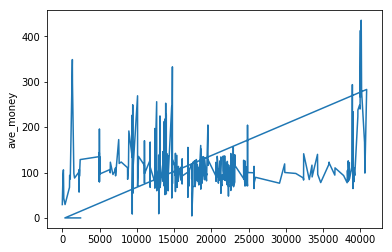

BK00049


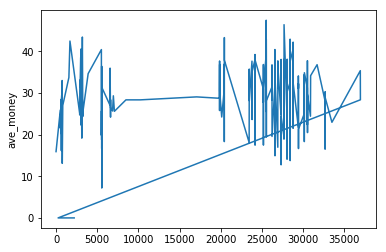

BK00050


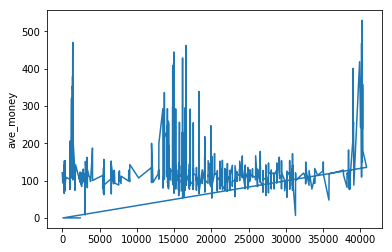

BK00051


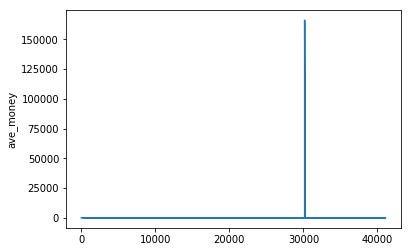

BK00044


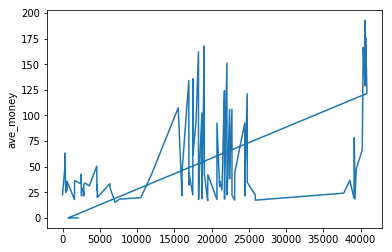

BK00052


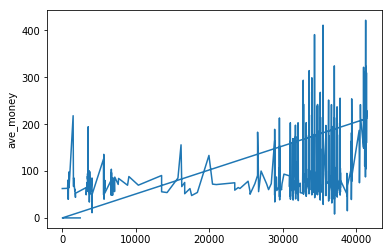

BK00031


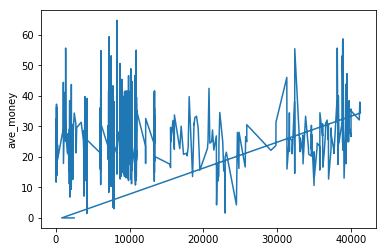

BK00028


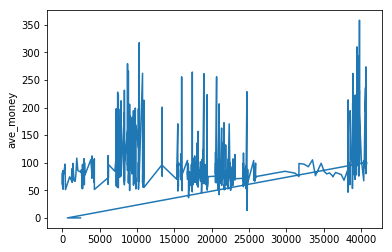

BK00017


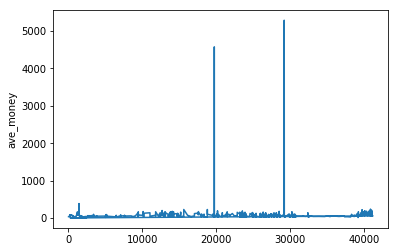

BK00045


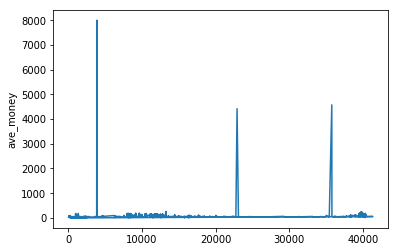

BK00027


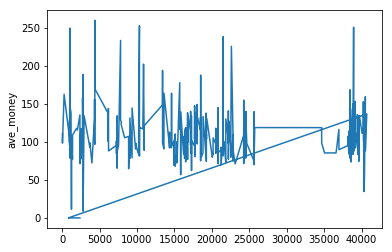

BK00041


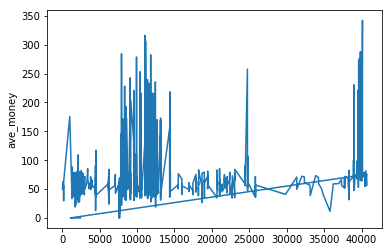

BK00047


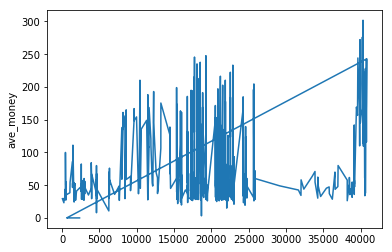

BK00009


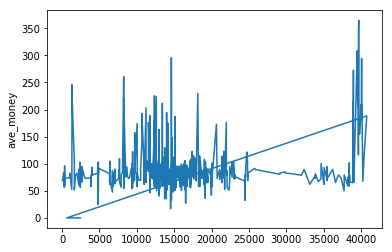

BK00025


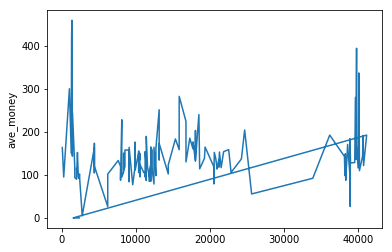

BK00024


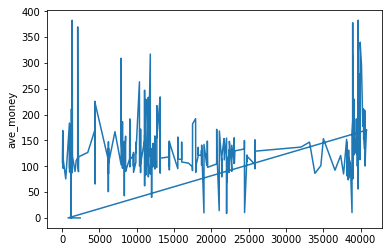

BK00014


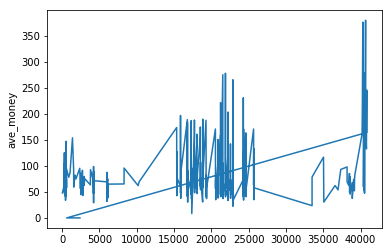

BK00026


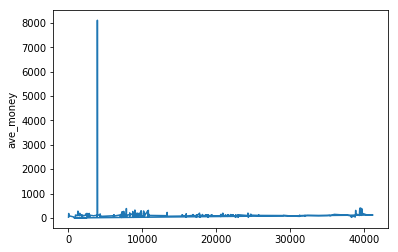

BK00042


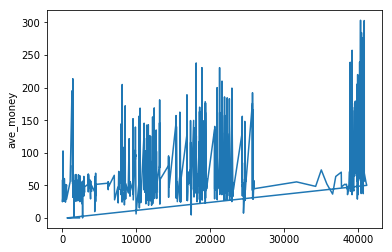

BK00046


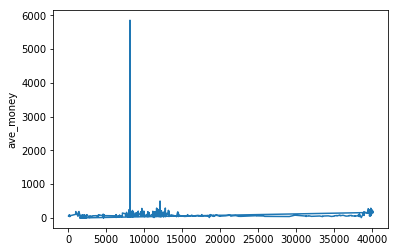

BK00043


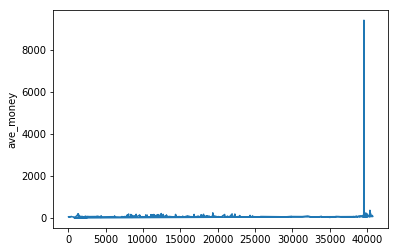

BK00013


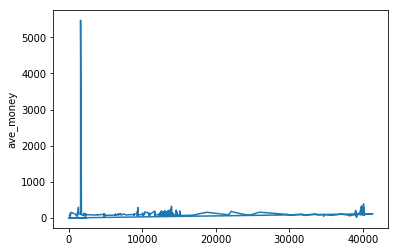

BK00012


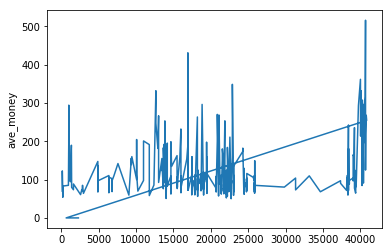

BK00005


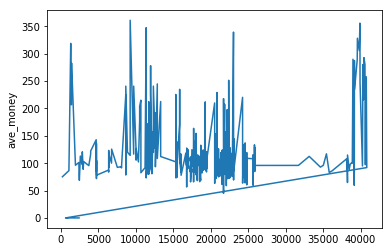

BK00011


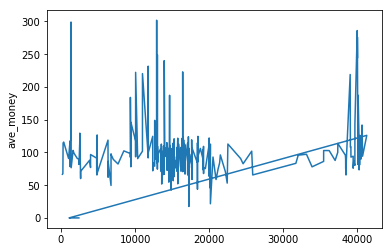

BK00010


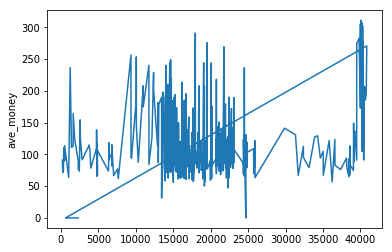

BK00003


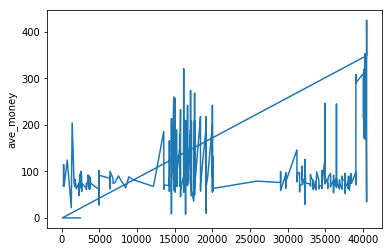

BK00033


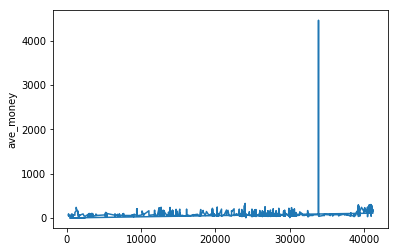

BK00053


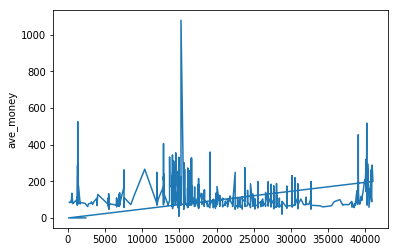

BK00006


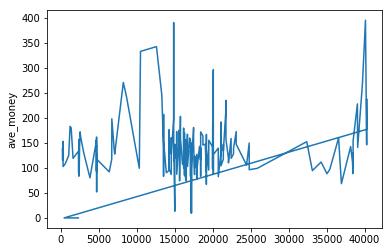

BK00004


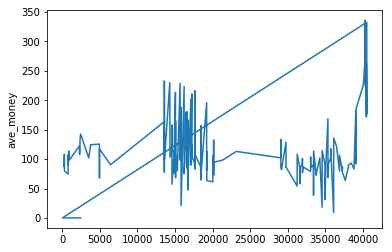

BK00002


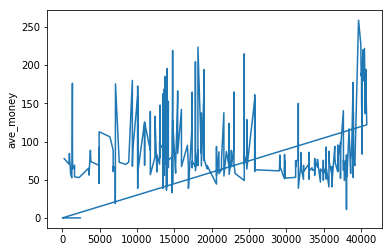

BK00007


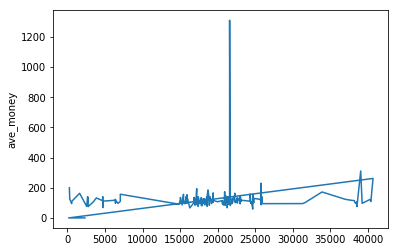

BK00015


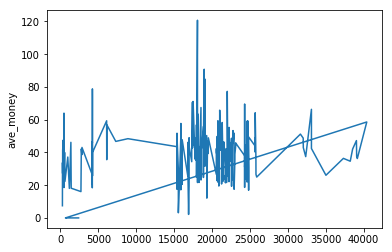

BK00016


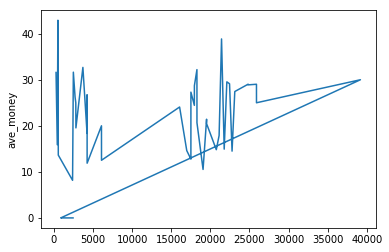

BK00019


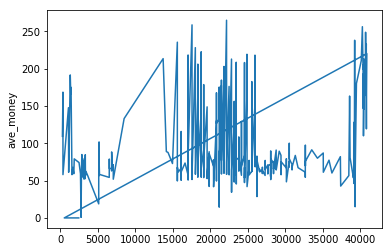

BK00030


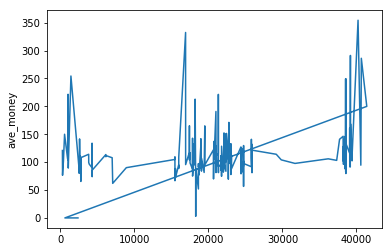

BK00048


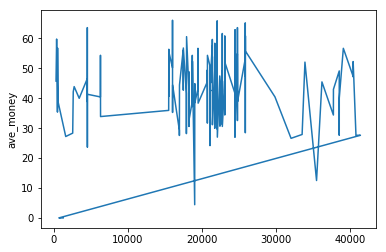

BK00018


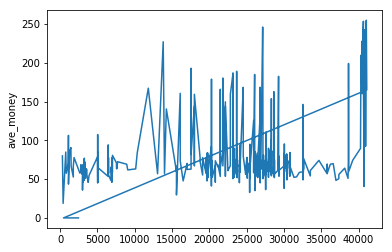

BK00008


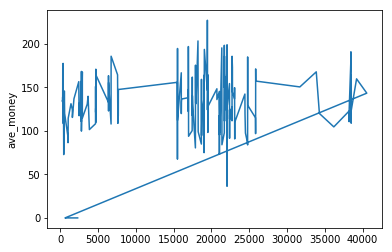

BK00029


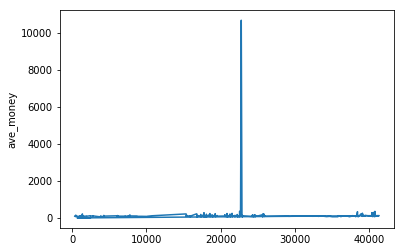

BK00065


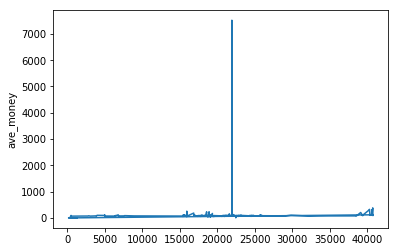

BK00035


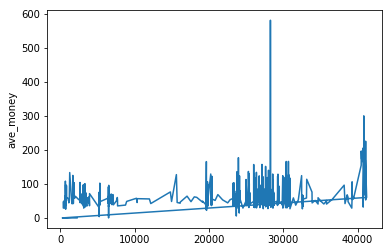

BK00036


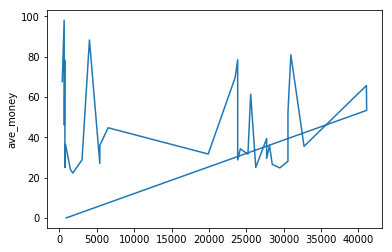

BK00022


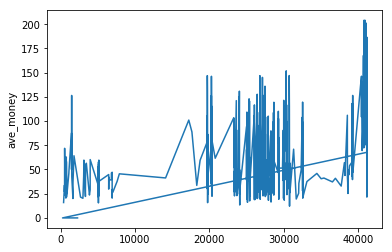

BK00023


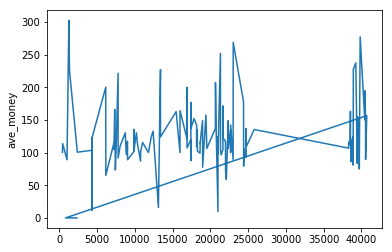

BK00054


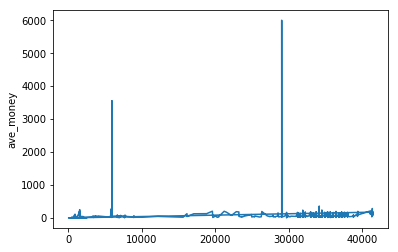

BK00038


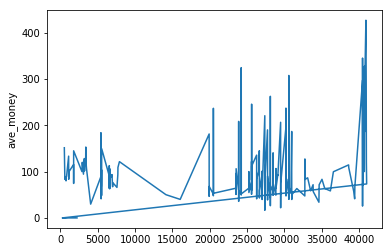

BK00037


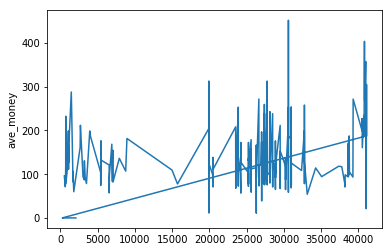

BK00034


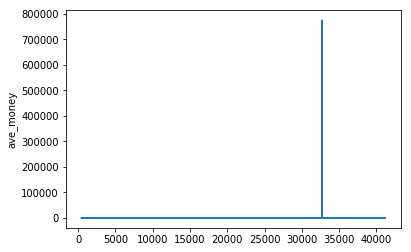

BK00058


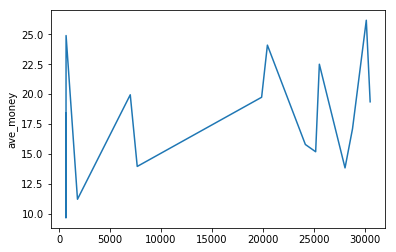

BK00066


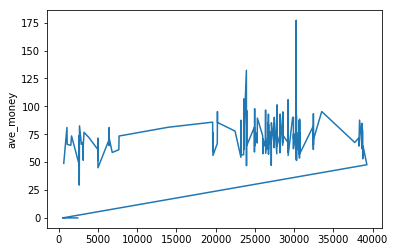

BK00039


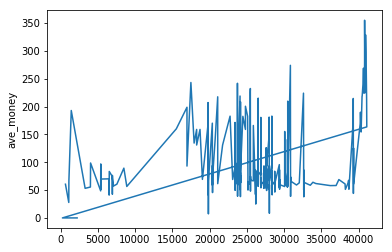

BK00057


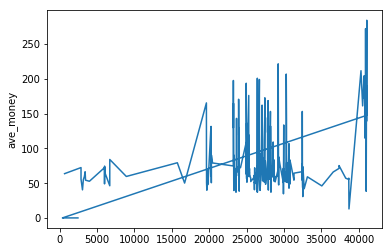

BK00020


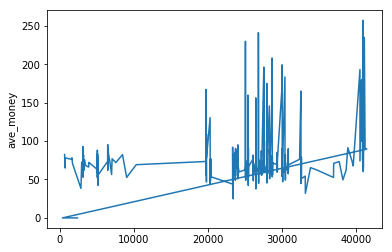

BK00059


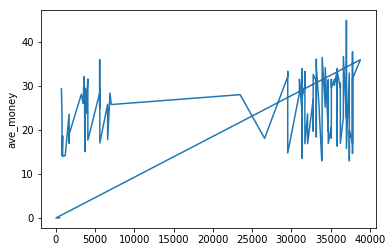

BK00060


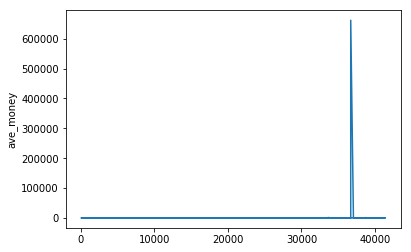

BK00063


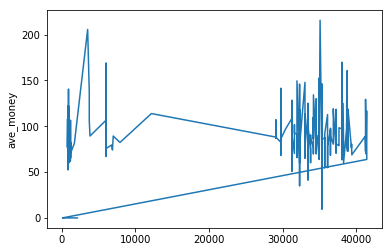

BK00055


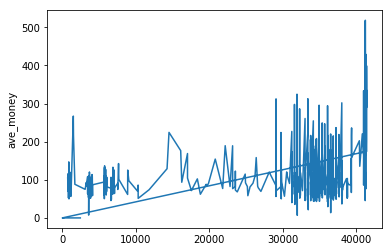

BK00061


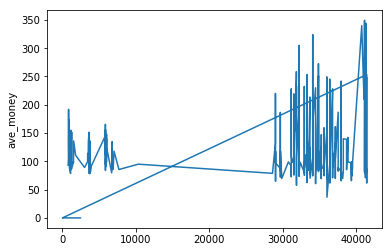

BK00040


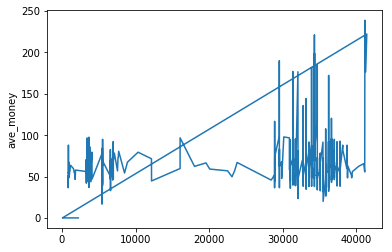

BK00056


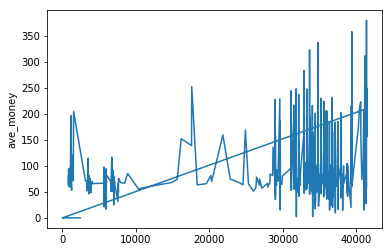

BK00062


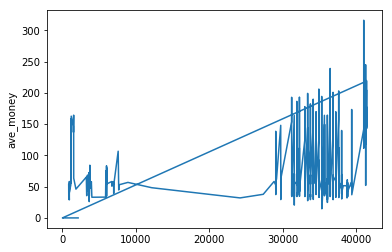

BK00021


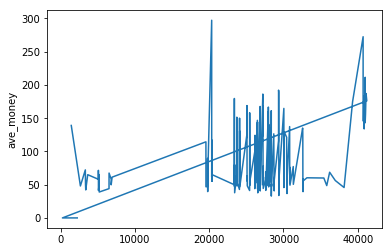

BK00032


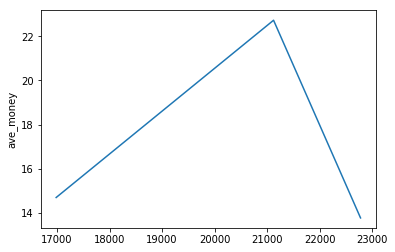

BK00001


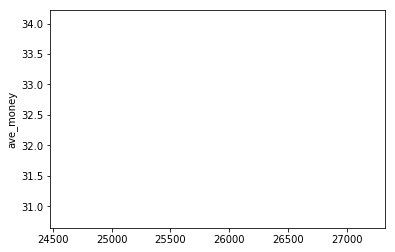

In [105]:
print(len(data['plate'].unique()))
for r in data['plate'].unique():
    print(r)
    plt.plot(data[data['plate']==r]['ave_money'])
    plt.ylabel("ave_money")
    plt.show()

RG00001


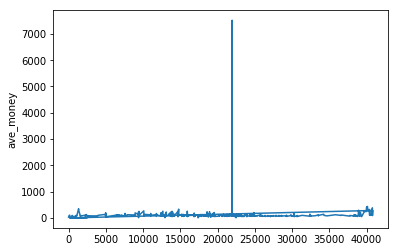

RG00002


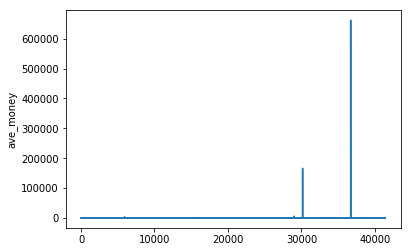

RG00003


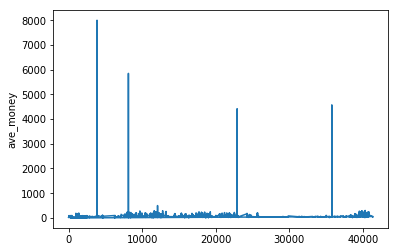

RG00006


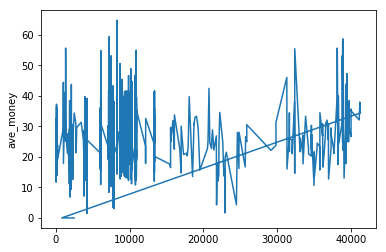

RG00007


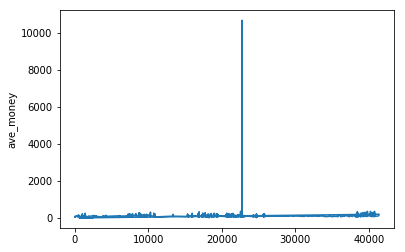

RG00010


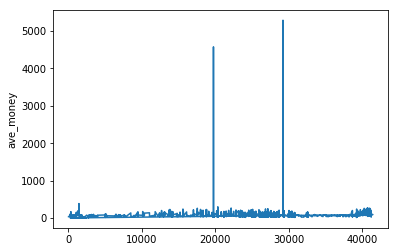

RG00008


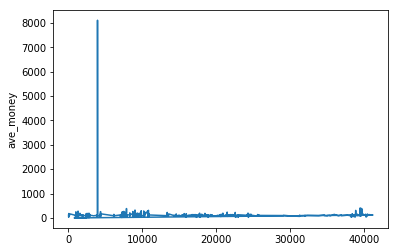

RG00004


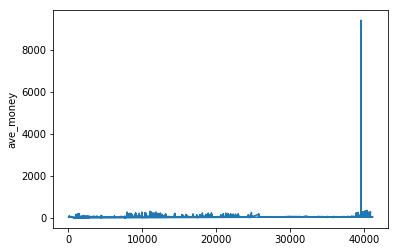

RG00012


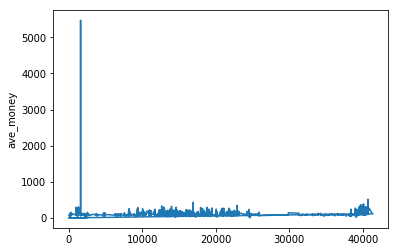

RG00009


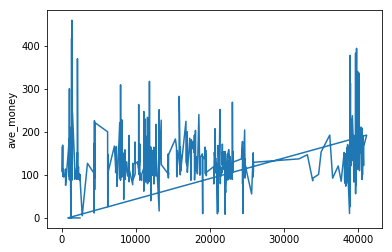

RG00011


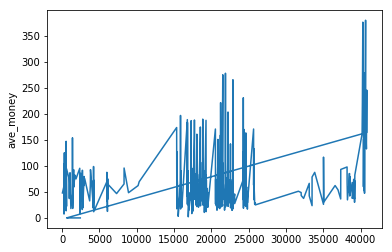

RG00013


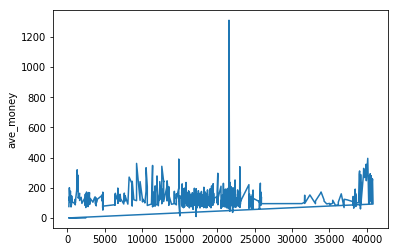

RG00014


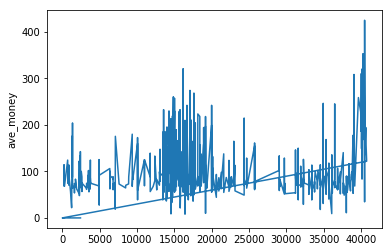

RG00005


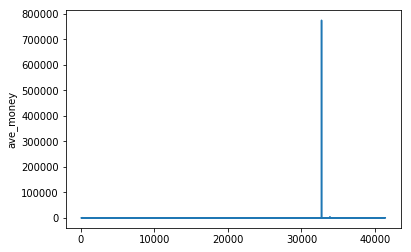

RG00015


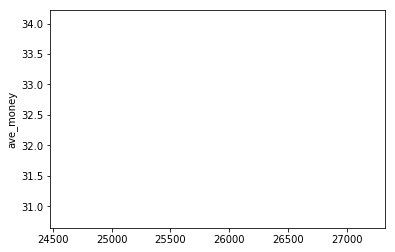

In [101]:
for r in data['region'].unique():
    print(r)
    plt.plot(data[data['region']==r]['ave_money'])
    plt.ylabel("ave_money")
    plt.show()
    
#这里存在一些每平方租金的数据异常
#可以将每平方米租金异常的数据进行清理

['RG00001' 'RG00002' 'RG00003' 'RG00006' 'RG00007' 'RG00010' 'RG00008'
 'RG00004' 'RG00012' 'RG00009' 'RG00011' 'RG00013' 'RG00014' 'RG00005'
 'RG00015']
RG00001


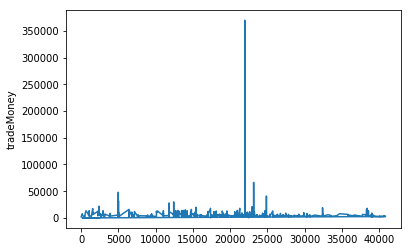

RG00002


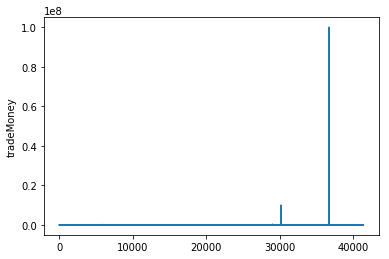

RG00003


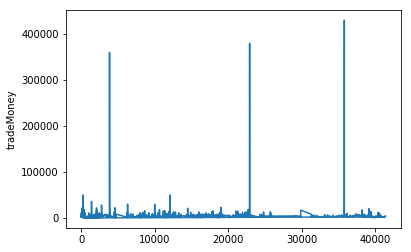

RG00006


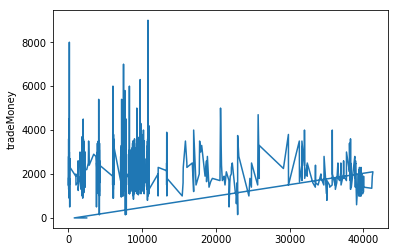

RG00007


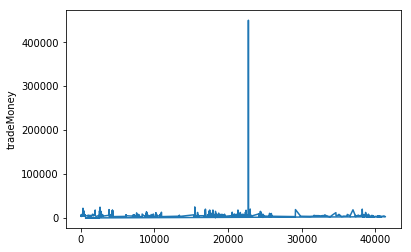

RG00010


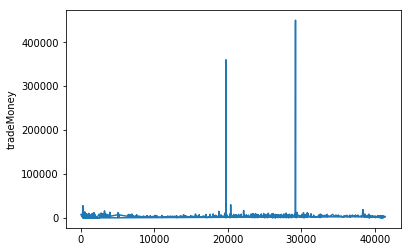

RG00008


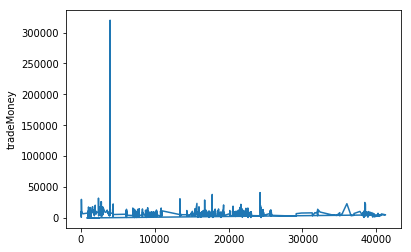

RG00004


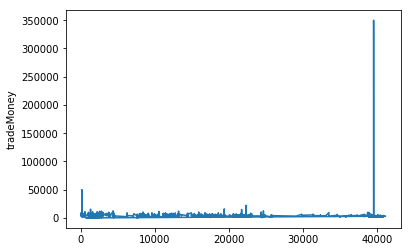

RG00012


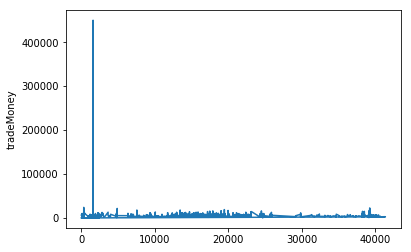

RG00009


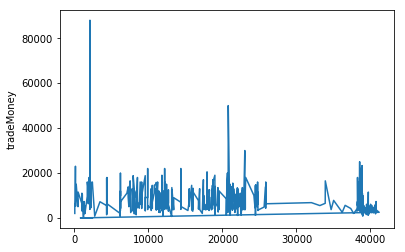

RG00011


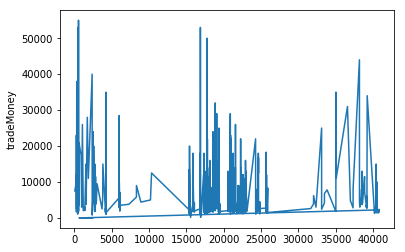

RG00013


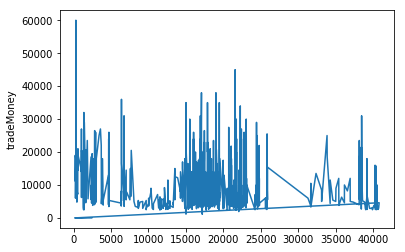

RG00014


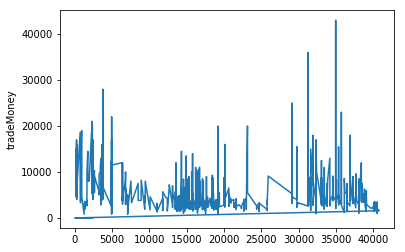

RG00005


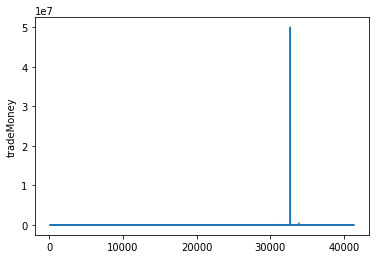

RG00015


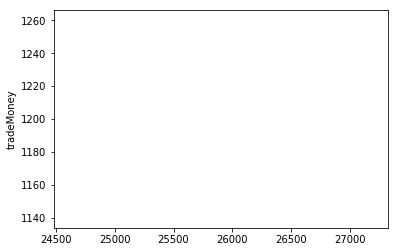

In [102]:
print(data['region'].unique())
for r in data['region'].unique():
    print(r)
    plt.plot(data[data['region']==r]['tradeMoney'])
    plt.ylabel("tradeMoney")
    plt.show()
    
#这里显示的是每个区域的交易金额分布，可以看出每个区域都存储一些异常数据
#可以考虑将这些异常数据进行清除

['RG00001' 'RG00002' 'RG00003' 'RG00006' 'RG00007' 'RG00010' 'RG00008'
 'RG00004' 'RG00012' 'RG00009' 'RG00011' 'RG00013' 'RG00014' 'RG00005'
 'RG00015']
RG00001


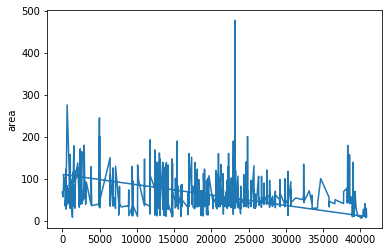

RG00002


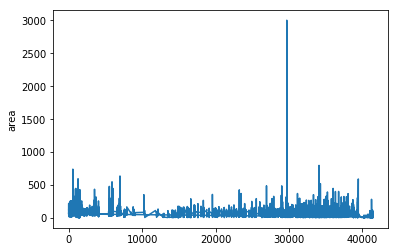

RG00003


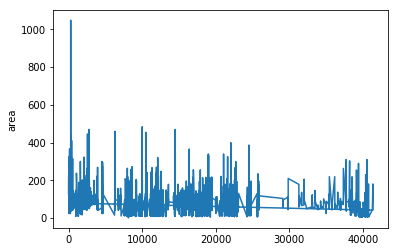

RG00006


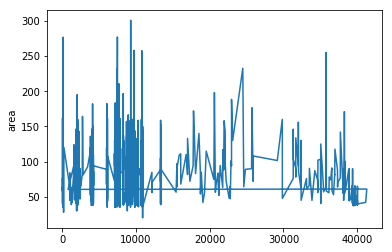

RG00007


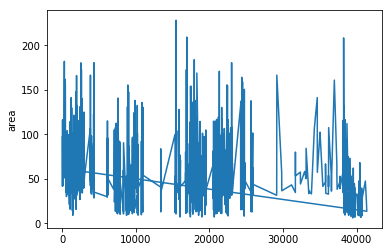

RG00010


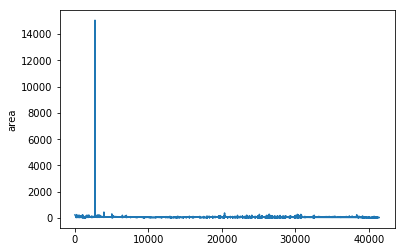

RG00008


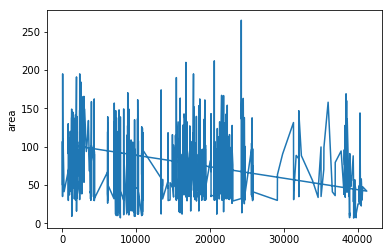

RG00004


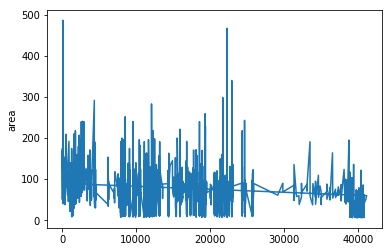

RG00012


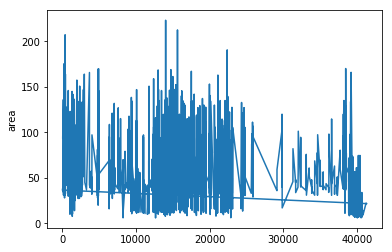

RG00009


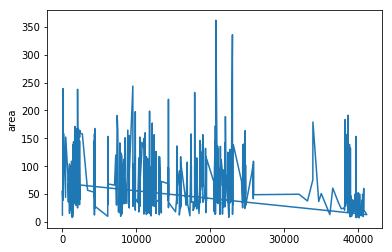

RG00011


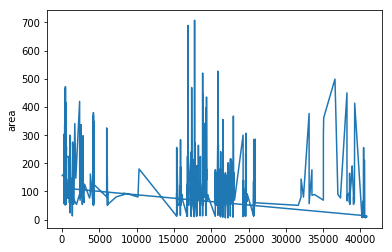

RG00013


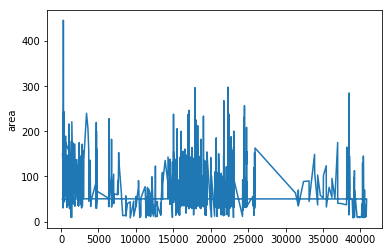

RG00014


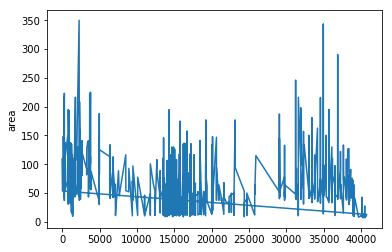

RG00005


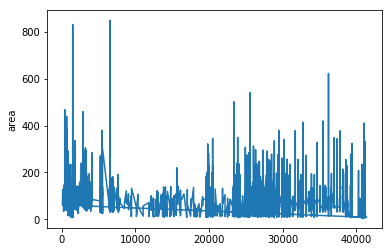

RG00015


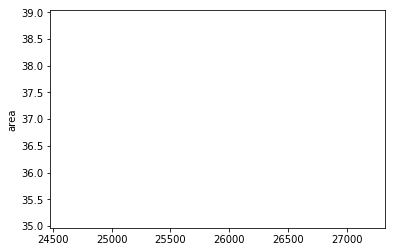

In [95]:
print(data['region'].unique())
for r in data['region'].unique():
    print(r)
    plt.plot(data[data['region']==r]['area'])
    plt.ylabel("area")
    plt.show()

In [ ]:
#根据上述图，我们可以将一定范围内的异常点进行清除
def deep_delete(data):
    data=data.drop(data[(data['region']=='RG00001')&(data['tradeMoney']>50000|data['area']>200)].index,inplace=True)
    data=data.drop(data[(data['region']=='RG00002')&(data['tradeMoney']>100000|data['area']>500)].index,inplace=True)
    data=data.drop(data[(data['region']=='RG00003')&(data['tradeMoney']>50000|data['area']>400)].index,inplace=True)
    data=data.drop(data[(data['region']=='RG00007')&(data['tradeMoney']>50000|data['area']>200)].index,inplace=True)
    data=data.drop(data[(data['region']=='RG00010')&(data['tradeMoney']>50000|data['area']>500)].index,inplace=True)
    data=data.drop(data[(data['region']=='RG00008')&(data['tradeMoney']>50000|data['area']>200)].index,inplace=True)
    data=data.drop(data[(data['region']=='RG00004')&(data['tradeMoney']>30000|data['area']>250)].index,inplace=True)
    data=data.drop(data[(data['region']=='RG00012')&(data['tradeMoney']>50000|data['area']>200)].index,inplace=True)
    data=data.drop(data[(data['region']=='RG00009')&(data['tradeMoney']>25000|data['area']>200)].index,inplace=True)
    data=data.drop(data[(data['region']=='RG00011')&(data['tradeMoney']>40000|data['area']>500)].index,inplace=True)
    data=data.drop(data[(data['region']=='RG00013')&(data['tradeMoney']>40000|data['area']>250)].index,inplace=True)
    data=data.drop(data[(data['region']=='RG00014')&(data['tradeMoney']>20000|data['area']>250)].index,inplace=True)
    data=data.drop(data[(data['region']=='RG00005')&(data['tradeMoney']>50000|data['area']>400)].index,inplace=True)
    return data

data=deep_delete(data)